# QF 625 Introduction to Programming
## Exercise 1 | `Answers`

> Hi Team,

> As I mentioned in my class note, the current script contains questions to help you to consolidate your learning up to this point. 

> On the one hand, this will be a good revision of what you have learned from the lessons (and assigned readings). On the other hand, these exercise questions are also designed as a pathway to your learning in the upcoming week’s lessons. 

> It may be that you cannot answer every question. If you are unsure about how to answer a question, look for clues in the assigned readings. I'll give you further guidance to the answers in upcoming weeks’ lessons.

> To maximize your learning, the answers will be given to you in a review session during Lessson 4 on Monday.

### Please import necessary libraries

In [1]:
import pandas as pd

### BONUS Exercise

In [2]:
import os

path = "./data_folder/" # Please store all the CSV files under the folder named "data_folder" within our "qf625" folder :)

csv_files = [file for file in os.listdir(path) if not file.startswith(".")]

entire_months = pd.DataFrame()

for file in csv_files:
    current_data = pd.read_csv(path+"/"+file)
    entire_months = pd.concat([entire_months, current_data])
    
entire_months.to_csv("data_exercise1.csv", index = False)

### Please read `data_exercise1.csv`

In [3]:
exercise = pd.read_csv("data_exercise1.csv")

### ***Now let's clean up the dataset :)***

> The first step in this exercise is figuring out what we need to clean.

### Question 1. Please remove rows of NAN

In [4]:
exercise.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [5]:
NaN_DF = exercise[exercise.isna().any(axis = 1)]
NaN_DF.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
69,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
exercise = exercise.dropna(how = "all")
exercise.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


### Question 2. Please remove text in `Order Date` column

In [7]:
exercise = exercise[exercise["Order Date"].str[0:2]!="Or"]

### Question 3. Please make columns correct type: namely, make `Quantity Ordered` and `Price Each` as numeric data types.

In [8]:
exercise.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
exercise["Quantity Ordered"] = pd.to_numeric(exercise["Quantity Ordered"])
exercise["Price Each"] = pd.to_numeric(exercise["Price Each"])
exercise.shape

(185950, 6)

### ***Let's create additional columns (variables) for your data exploration.***

### Question 4. Please add `Month` column: Create the `Month` from `Order Date` column

In [10]:
exercise["Month"] = exercise["Order Date"].str[0:2]
exercise["Month"] = exercise["Month"].astype("int64")
exercise.shape

(185950, 7)

In [11]:
exercise.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


### Question 5. Please add `City` column: Create the `City` from `Purchase Address` column

In [12]:
def city(address):
    return address.split(",")[1].strip(" ")

def state(address):
    return address.split(",")[2].split(" ")[1]

exercise["City"] = exercise["Purchase Address"].apply(lambda x: f"{city(x)}  ({state(x)})")
exercise.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,New York City (NY)
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,Austin (TX)
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,Los Angeles (CA)
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,Seattle (WA)
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,Boston (MA)


### ***Now, let's explore our data***

### Question 6: What was the best month for the business? How much was earned that month? Please use `Quantity Ordered` and `Price Each` columns to create a new column (variable) `Gross Revenue`.

In [13]:
exercise["Gross Revenue"] = exercise["Quantity Ordered"].astype("int") * exercise["Price Each"].astype("float")

In [14]:
exercise.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Gross Revenue
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,New York City (NY),11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,Austin (TX),23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,Los Angeles (CA),150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,Seattle (WA),149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,Boston (MA),99.99


In [15]:
exercise.groupby(["Month"]).sum()

,Quantity Ordered,Price Each,Gross Revenue
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Question 7. Please create a vertical bar plot that summarizes the `monthly` `gross revenue`.

In [16]:
import matplotlib.pyplot as plt

In [17]:
months = range(1, 13)
print(months)

range(1, 13)


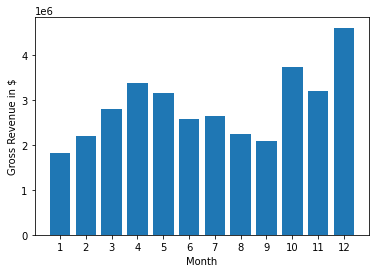

In [18]:
plt.bar(months, exercise.groupby(["Month"]).sum()["Gross Revenue"])
plt.ylabel("Gross Revenue in $")
plt.xlabel("Month")
plt.xticks(months)
plt.show()

### Question 8: What `City` sold the most product based on `Quantity Ordered` and `Gross Revenue`?

In [19]:
exercise.groupby(["City"]).sum()

,Quantity Ordered,Price Each,Month,Gross Revenue
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


### Question 9. Please visualize the above results with horizontal bar plot.

In [20]:
city_ticks = [city for city, df in exercise.groupby(["City"])]
print(city_ticks)

['Atlanta  (GA)', 'Austin  (TX)', 'Boston  (MA)', 'Dallas  (TX)', 'Los Angeles  (CA)', 'New York City  (NY)', 'Portland  (ME)', 'Portland  (OR)', 'San Francisco  (CA)', 'Seattle  (WA)']


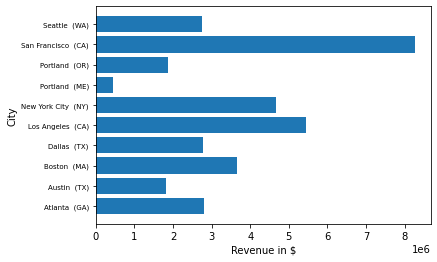

In [21]:
plt.barh(city_ticks, exercise.groupby(["City"]).sum()["Gross Revenue"])
plt.xlabel("Revenue in $")
plt.ylabel("City")
plt.yticks(city_ticks, size = 7) #, rotation = "vertical")
plt.show()

### Question 10: What time should we display ads to maximize likelihood of customer's buying product? Please create a new variable `Hour` from column `Order Date`

In [22]:
exercise.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Gross Revenue
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,New York City (NY),11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,Austin (TX),23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,Los Angeles (CA),150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,Seattle (WA),149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,Boston (MA),99.99


In [23]:
exercise["Hour"] = pd.to_datetime(exercise["Order Date"]).dt.hour
exercise.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Gross Revenue,Hour
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,New York City (NY),11.99,9
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,Austin (TX),23.90,10
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,Los Angeles (CA),150.00,14
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,Seattle (WA),149.99,22
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,Boston (MA),99.99,13


In [24]:
exercise["Minute"] = pd.to_datetime(exercise["Order Date"]).dt.minute

### Question 11. Please visualize the results of your analysis above.

In [25]:
hour_range = range(0, 24)

In [26]:
hour_list = [h for h, df in exercise.groupby(["Hour"])]

In [27]:
exercise["Order Count"] = 1 # Assign the same weights across all the orders
exercise.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Gross Revenue,Hour,Minute,Order Count
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,New York City (NY),11.99,9,54,1
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,Austin (TX),23.90,10,3,1
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,Los Angeles (CA),150.00,14,56,1
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,Seattle (WA),149.99,22,24,1
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,Boston (MA),99.99,13,56,1


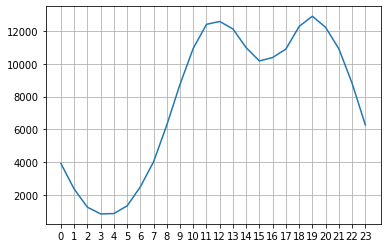

In [28]:
plt.plot(hour_range, exercise.groupby(["Hour"]).count()["Order Count"])
plt.xticks(hour_range)
plt.grid()
plt.show()

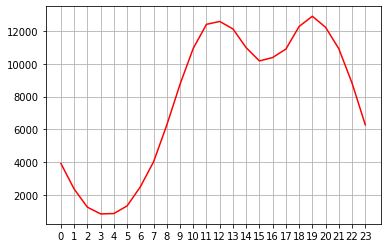

In [29]:
plt.plot(hour_list, exercise.groupby(["Hour"]).count()["Order Count"], color = "red")
plt.xticks(hour_list)
plt.grid()
plt.show()

> `Thank you for working with the script :)`

In [30]:
exit()